# Text Preprocessing and Feature Extraction for Document Classification

Machine, kidding, you learn how to:
1.  Clean and preprocess text data
2.	Transform text into numerical features using Bag of Words (BoW) and TF-IDF
3.	Train and evaluate a simple text classification model
4.	Visualize word distributions, TF-IDF importance, and classification results


Step 1. Import Required Libraries



In [1]:
# Basic libraries for data processing
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing tools
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Feature extraction and modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Visualization
from wordcloud import WordCloud

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Step 2. Create Example Dataset

In [2]:
# Sample dataset for classification
data = {
    'text': [
        "I love watching football and basketball games.",
        "Python and machine learning are my favorite subjects.",
        "Data science and AI are changing the world.",
        "The player scored three goals in the match.",
        "I enjoy coding in Python and building models.",
        "Tennis and swimming are great for health.",
        "Deep learning models achieve amazing accuracy.",
        "He plays cricket every weekend with friends.",
        "Artificial intelligence helps automate many tasks.",
        "The team won the championship last night!"
        # "I love deep learning and neural networks.", #new extra data
        # "He plays football every evening with his friends.",
        # "AI and data analytics are essential for business.",
        # "She runs marathons and practices yoga daily.",
        # "Programming in Python is enjoyable and creative.",
        # "The basketball team trained hard for the finals.",
        # "Machine learning models can predict trends.",
        # "The coach prepared new strategies for the game.",
        # "Blockchain is transforming digital transactions.",
        # "The player received the best athlete award."
    ],
    'label': [
        "sports", "tech", "tech", "sports", "tech",
        "sports", "tech", "sports", "tech", "sports"
        # "tech", "sports", "tech", "sports", "tech",#new extra data
        # "sports", "tech", "sports", "tech", "sports"
    ]
}

df = pd.DataFrame(data)
df

,text,label
0,I love watching football and basketball games.,sports
1,Python and machine learning are my favorite su...,tech
2,Data science and AI are changing the world.,tech
3,The player scored three goals in the match.,sports
4,I enjoy coding in Python and building models.,tech
5,Tennis and swimming are great for health.,sports
6,Deep learning models achieve amazing accuracy.,tech
7,He plays cricket every weekend with friends.,sports
8,Artificial intelligence helps automate many ta...,tech
9,The team won the championship last night!,sports


Step 3. Text Preprocessing

We will:
1.  Lowercase all words
2.	Tokenize (split sentences into words)
3.	Remove stopwords (common useless words like “and”, “the”)
4.	Apply stemming and lemmatization

In [3]:
# Initialize tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Tokenize into words
    tokens = word_tokenize(text)

    # 3. Remove stopwords and non-alphanumeric tokens
    tokens = [w for w in tokens if w.isalnum() and w not in stop_words]

    # 4. Apply stemming
    stemmed = [stemmer.stem(w) for w in tokens]

    # 5. Apply lemmatization
    lemmatized = [lemmatizer.lemmatize(w) for w in stemmed]

    # 6. Join back into one string
    return " ".join(lemmatized)

# Apply to dataset
df['clean_text'] = df['text'].apply(preprocess_text)
df[['text', 'clean_text']]

,text,clean_text
0,I love watching football and basketball games.,love watch footbal basketbal game
1,Python and machine learning are my favorite su...,python machin learn favorit subject
2,Data science and AI are changing the world.,data scienc ai chang world
3,The player scored three goals in the match.,player score three goal match
4,I enjoy coding in Python and building models.,enjoy code python build model
5,Tennis and swimming are great for health.,tenni swim great health
6,Deep learning models achieve amazing accuracy.,deep learn model achiev amaz accuraci
7,He plays cricket every weekend with friends.,play cricket everi weekend friend
8,Artificial intelligence helps automate many ta...,artifici intellig help autom mani task
9,The team won the championship last night!,team championship last night


Step 4. Visualize Most Frequent Words (WordClouds)

Word clouds are a quick visual way to explore dominant terms in each category.

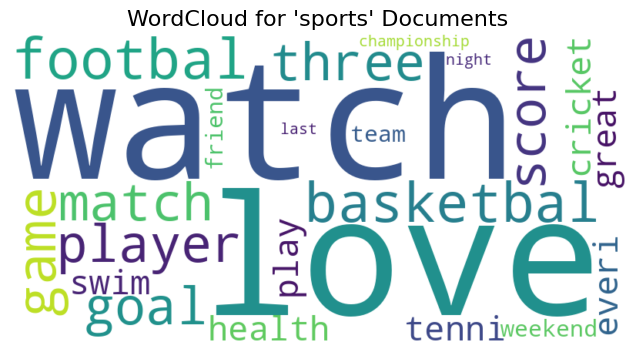

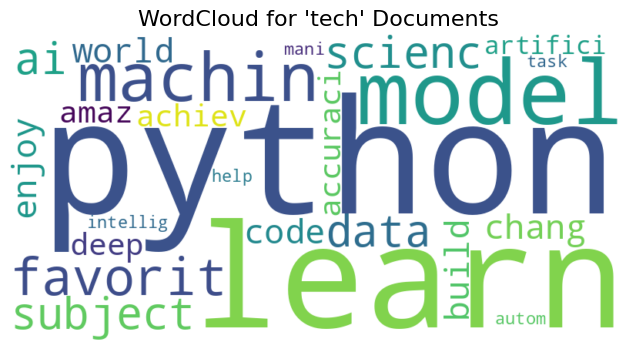

In [4]:
# Create word clouds for each label
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for '{label}' Documents", fontsize=16)
    plt.show()

Step 5. Convert Text into Features

We’ll create both Bag of Words and TF-IDF matrices to compare.

5.1 Bag of Words

In [5]:
# Create a Bag of Words representation
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['clean_text'])

# View BoW as a table
pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

,accuraci,achiev,ai,amaz,artifici,autom,basketbal,build,championship,chang,...,score,subject,swim,task,team,tenni,three,watch,weekend,world
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


5.2 TF-IDF

In [6]:
# Create TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['clean_text'])

# View TF-IDF matrix
pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

,accuraci,achiev,ai,amaz,artifici,autom,basketbal,build,championship,chang,...,score,subject,swim,task,team,tenni,three,watch,weekend,world
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.447214,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.474295,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.447214,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.447214
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.447214,0.000000,0.0,0.000000,0.0,0.0,0.447214,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.474295,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.5,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.000000
6,0.428537,0.428537,0.000000,0.428537,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.447214,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.408248,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,...,0.000000,0.000000,0.0,0.000000,0.5,0.0,0.000000,0.000000,0.000000,0.000000


Step 6. Visualize TF-IDF Feature Importance

TF-IDF highlights important, unique words for each document.

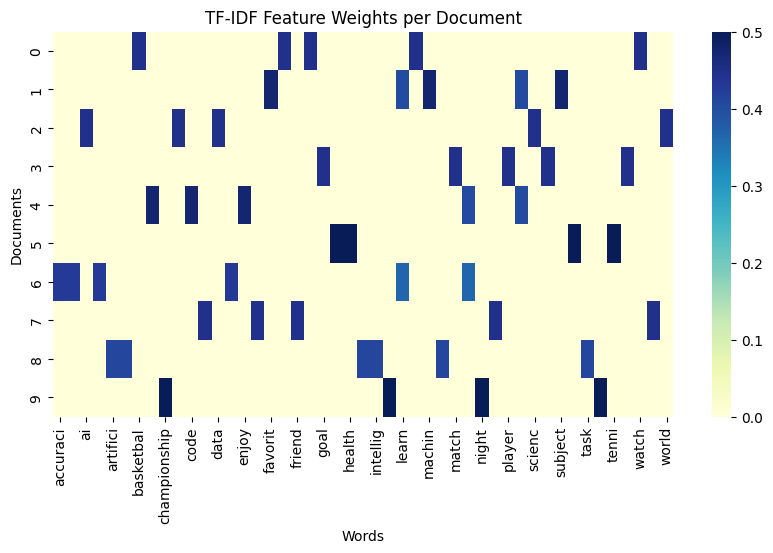

In [7]:
# Convert TF-IDF results to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(tfidf_df, cmap="YlGnBu", cbar=True)
plt.title("TF-IDF Feature Weights per Document")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

Step 7. Split Data and Train a Classifier

We’ll use a Naive Bayes model, which performs well for text classification tasks.

In [8]:
# Define features (X) and labels (y)
X = X_tfidf
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

Step 8. Evaluate Classification Results

In [9]:
# Print detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      sports       0.00      0.00      0.00         2
        tech       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 9. Confusion Matrix Visualization

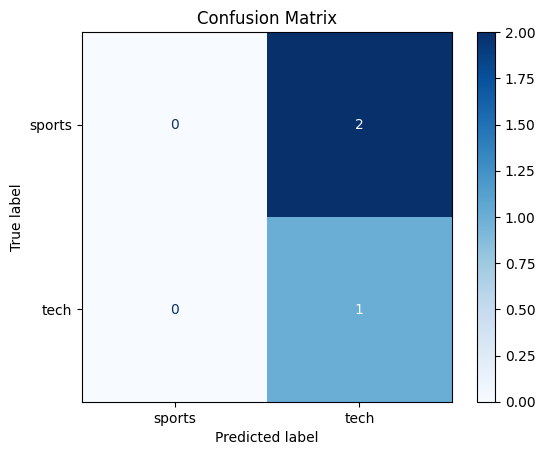

In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

**Step 10. Feature Importance Visualization**

We can inspect which words are most indicative of each class (using log probabilities from Naive Bayes).

(Higher = more associated with "sports" or "tech")

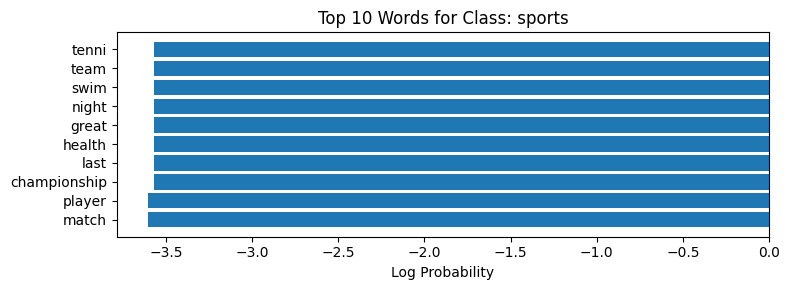

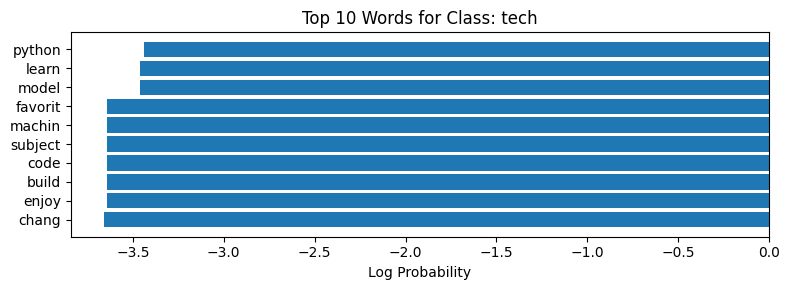

In [11]:
# Get top features per class
feature_names = np.array(vectorizer_tfidf.get_feature_names_out())
for i, class_label in enumerate(model.classes_):
    top10 = np.argsort(model.feature_log_prob_[i])[-10:]
    plt.figure(figsize=(8,3))
    plt.barh(feature_names[top10], model.feature_log_prob_[i][top10])
    plt.title(f"Top 10 Words for Class: {class_label}")
    plt.xlabel("Log Probability")
    plt.tight_layout()
    plt.show()

> “If your model performs poorly, don’t panic — it may not be the algorithm’s fault. Data quantity, diversity, and preprocessing often matter much more than the model type.”

1. Increase the dataset (add more sentences)

Add more examples per class so the model can generalize. Below code doubles the number of samples → better learning.


In [12]:
# Add more tech and sports samples to improve balance
extra_data = {
    'text': [
        "I love watching football and basketball games.",
        "Python and machine learning are my favorite subjects.",
        "Data science and AI are changing the world.",
        "The player scored three goals in the match.",
        "I enjoy coding in Python and building models.",
        "Tennis and swimming are great for health.",
        "Deep learning models achieve amazing accuracy.",
        "He plays cricket every weekend with friends.",
        "Artificial intelligence helps automate many tasks.",
        "The team won the championship last night!",
        "I love deep learning and neural networks.", #new extra data
        "He plays football every evening with his friends.",
        "AI and data analytics are essential for business.",
        "She runs marathons and practices yoga daily.",
        "Programming in Python is enjoyable and creative.",
        "The basketball team trained hard for the finals.",
        "Machine learning models can predict trends.",
        "The coach prepared new strategies for the game.",
        "Blockchain is transforming digital transactions.",
        "The player received the best athlete award."
    ],
    'label': [
        "sports", "tech", "tech", "sports", "tech",
        "sports", "tech", "sports", "tech", "sports",
        "tech", "sports", "tech", "sports", "tech",#new extra data
        "sports", "tech", "sports", "tech", "sports"
    ]
}

df_extra = pd.DataFrame(extra_data)
df = pd.concat([df, df_extra], ignore_index=True)

# Re-run preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)
df

,text,label,clean_text
0,I love watching football and basketball games.,sports,love watch footbal basketbal game
1,Python and machine learning are my favorite su...,tech,python machin learn favorit subject
2,Data science and AI are changing the world.,tech,data scienc ai chang world
3,The player scored three goals in the match.,sports,player score three goal match
4,I enjoy coding in Python and building models.,tech,enjoy code python build model
5,Tennis and swimming are great for health.,sports,tenni swim great health
6,Deep learning models achieve amazing accuracy.,tech,deep learn model achiev amaz accuraci
7,He plays cricket every weekend with friends.,sports,play cricket everi weekend friend
8,Artificial intelligence helps automate many ta...,tech,artifici intellig help autom mani task
9,The team won the championship last night!,sports,team championship last night


2. Shuffle and Stratify Split

Ensure both “sports” and “tech” appear equally in train/test.

Now the model gets balanced samples and typically yields higher accuracy for this toy dataset.

In [13]:
X = vectorizer_tfidf.fit_transform(df['clean_text'])
y = df['label']

# Use stratify=y to preserve label ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      sports       1.00      1.00      1.00         5
        tech       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [14]:
print(X_train.size, X_test.size, y_train.size, y_test.size)
print(df['clean_text'])

104 44 21 9
0          love watch footbal basketbal game
1        python machin learn favorit subject
2                 data scienc ai chang world
3              player score three goal match
4              enjoy code python build model
5                    tenni swim great health
6      deep learn model achiev amaz accuraci
7          play cricket everi weekend friend
8     artifici intellig help autom mani task
9               team championship last night
10         love watch footbal basketbal game
11       python machin learn favorit subject
12                data scienc ai chang world
13             player score three goal match
14             enjoy code python build model
15                   tenni swim great health
16     deep learn model achiev amaz accuraci
17         play cricket everi weekend friend
18    artifici intellig help autom mani task
19              team championship last night
20            love deep learn neural network
21            play footbal everi even frien

3. Visualize Prediction Quality

Even for a small dataset, visualizations help to see performance intuitively.

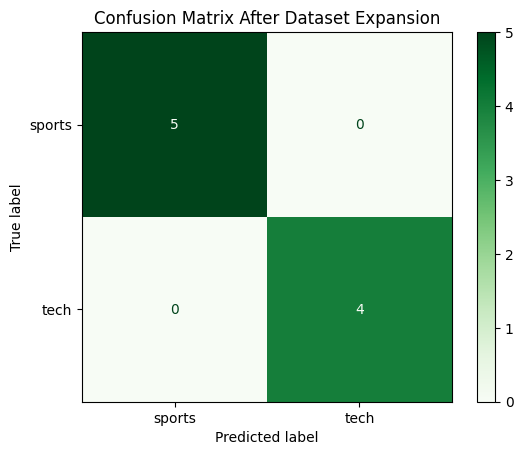

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Greens", values_format='d')
plt.title("Confusion Matrix After Dataset Expansion")
plt.show()

4. Visualize Model Confidence

A bar chart showing model probabilities for each class

In [16]:
# Predict probabilities for test samples
probs = model.predict_proba(X_test)

# Create a DataFrame of predictions
proba_df = pd.DataFrame(probs, columns=model.classes_)
proba_df['True Label'] = y_test.values
proba_df['Predicted'] = y_pred

proba_df.reset_index(drop=True, inplace=True)
proba_df

,sports,tech,True Label,Predicted
0,0.683548,0.316452,sports,sports
1,0.422980,0.577020,tech,tech
2,0.666378,0.333622,sports,sports
3,0.190077,0.809923,tech,tech
4,0.589599,0.410401,sports,sports
5,0.297276,0.702724,tech,tech
6,0.688281,0.311719,sports,sports
7,0.683613,0.316387,sports,sports
8,0.295929,0.704071,tech,tech


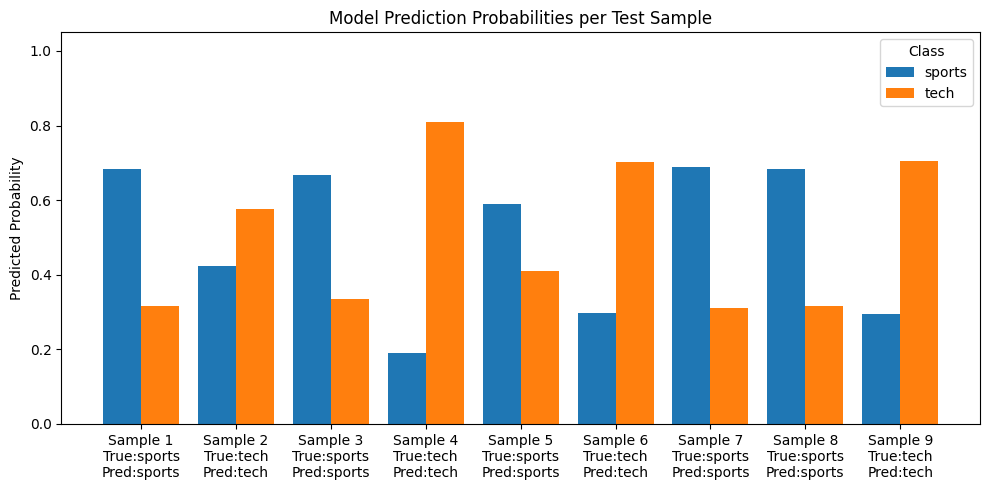

In [17]:
# Plot predicted probabilities
import numpy as np
import matplotlib.pyplot as plt

# Prepare
classes = list(model.classes_)
n_samples = proba_df.shape[0]
x = np.arange(n_samples) # positions for samples
width = 0.8 / len(classes) # bar width (fits all classes)

plt.figure(figsize=(10, 5))

# Plot one bar per class per sample
for i, cls in enumerate(classes):
    plt.bar(x + i * width, proba_df[cls].values, width, label=cls)

# Build x-tick labels showing sample number, true label and predicted label
xtick_labels = [f"Sample {i+1}\nTrue:{t}\nPred:{p}"
                for i, (t, p) in enumerate(zip(proba_df['True Label'], proba_df['Predicted']))]
plt.xticks(x + width * (len(classes) - 1) / 2, xtick_labels, rotation=0)
plt.ylim(0, 1.05)
plt.ylabel("Predicted Probability")
plt.title("Model Prediction Probabilities per Test Sample")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

##Document Clustering
YES, you learn to:
1.   Clean and preprocess text data
2.   Transform text into numerical vectors using Bag of Words and TF-IDF
3.	Measure text similarity and perform unsupervised clustering
4.	Understand results visually through plots and word clouds

Step 1. Import Libraries

In [18]:
# Import libraries for text processing and visualization
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK tools for text cleaning
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction and ML tools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# For generating word clouds
from wordcloud import WordCloud

# Download necessary NLTK resources (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Step 2. Create Example Dataset

In [19]:
# Create a small dataset with texts from different topics
data = {
    'text': [
        "The football match was exciting and full of energy.",
        "Basketball is a fast-paced game played on a court.",
        "Python is a popular programming language for AI and data analysis.",
        "New machine learning models are improving computer vision.",
        "Mountains and rivers make the landscape beautiful.",
        "Forests provide oxygen and home for many species.",
        "Basketball is a nice game.",
        "Football match statrts soon."
    ]
}

# Convert into a DataFrame
df = pd.DataFrame(data)
df

,text
0,The football match was exciting and full of en...
1,Basketball is a fast-paced game played on a co...
2,Python is a popular programming language for A...
3,New machine learning models are improving comp...
4,Mountains and rivers make the landscape beauti...
5,Forests provide oxygen and home for many species.
6,Basketball is a nice game.


Step 3. Text Preprocessing

In [20]:
# Initialize lemmatizer and stopword list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # 1. Convert to lowercase
    tokens = nltk.word_tokenize(text.lower())

    # 2. Remove stopwords and punctuation (keep only alphanumeric)
    tokens = [t for t in tokens if t.isalnum() and t not in stop_words]

    # 3. Lemmatize each token (convert to base form)
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    # 4. Rejoin tokens back into a string
    return " ".join(tokens)

# Apply the preprocessing function to all documents
df['clean_text'] = df['text'].apply(preprocess_text)

# Show before and after cleaning
df[['text', 'clean_text']]

,text,clean_text
0,The football match was exciting and full of en...,football match exciting full energy
1,Basketball is a fast-paced game played on a co...,basketball game played court
2,Python is a popular programming language for A...,python popular programming language ai data an...
3,New machine learning models are improving comp...,new machine learning model improving computer ...
4,Mountains and rivers make the landscape beauti...,mountain river make landscape beautiful
5,Forests provide oxygen and home for many species.,forest provide oxygen home many specie
6,Basketball is a nice game.,basketball nice game


Step 4. Word Cloud Visualization

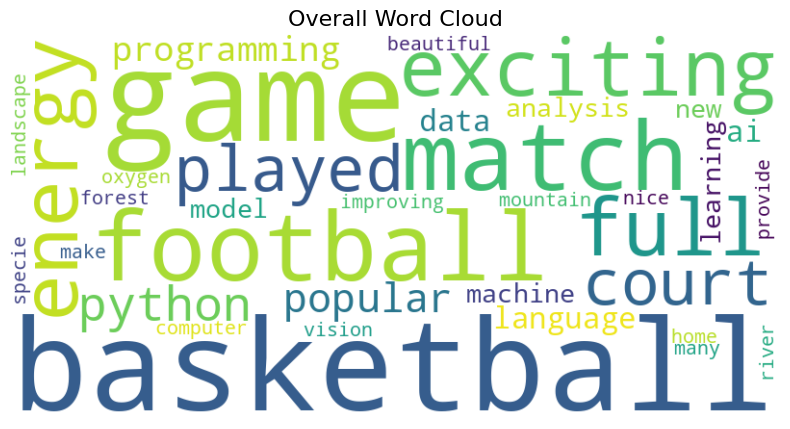

In [21]:
# Combine all cleaned text into one large string
text_all = " ".join(df['clean_text'])

# Generate a word cloud showing the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Word Cloud", fontsize=16)
plt.show()

Step 5. Convert Text to Vectors

5.1 Bag of Words

In [22]:
# Initialize Bag of Words vectorizer
bow = CountVectorizer()

# Fit and transform the cleaned text
X_bow = bow.fit_transform(df['clean_text'])

# Convert to DataFrame for easy viewing
pd.DataFrame(X_bow.toarray(), columns=bow.get_feature_names_out())

,ai,analysis,basketball,beautiful,computer,court,data,energy,exciting,football,...,nice,oxygen,played,popular,programming,provide,python,river,specie,vision
0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


5.2 TF-IDF

In [23]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the cleaned text
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Convert to DataFrame for better visualization
pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,ai,analysis,basketball,beautiful,computer,court,data,energy,exciting,football,...,nice,oxygen,played,popular,programming,provide,python,river,specie,vision
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.451635,0.000000,0.000000,0.544082,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.544082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.377964,0.377964,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964
4,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.408248,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000
6,0.000000,0.000000,0.538281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.648465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Step 6. Visualize TF-IDF Feature Weights

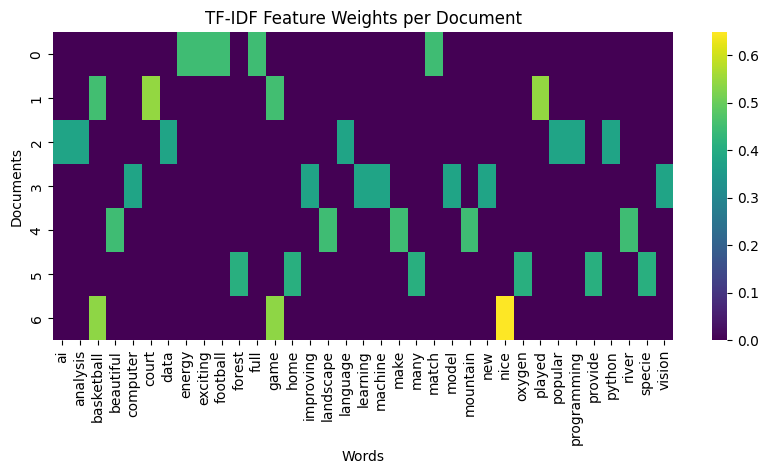

In [24]:
# Create a DataFrame for TF-IDF values
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Plot heatmap of TF-IDF scores
plt.figure(figsize=(10, 4))
sns.heatmap(tfidf_df, cmap="viridis", cbar=True)
plt.title("TF-IDF Feature Weights per Document")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

Step 7. Compute Document Similarity

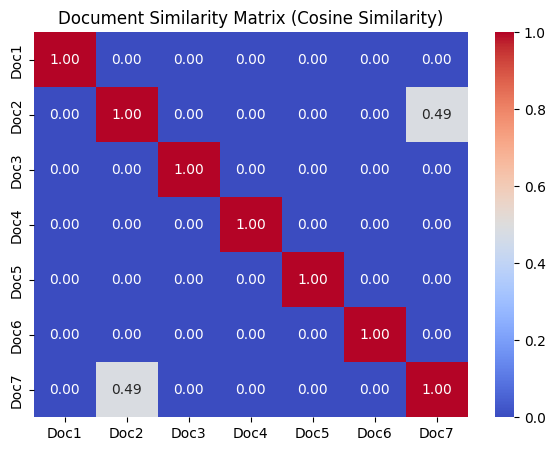

In [25]:
# Calculate cosine similarity between each pair of documents
similarity_matrix = cosine_similarity(X_tfidf)

# Convert to DataFrame for easier visualization
sim_df = pd.DataFrame(similarity_matrix,
                      index=[f"Doc{i+1}" for i in range(len(df))],
                      columns=[f"Doc{i+1}" for i in range(len(df))])

# Plot heatmap of cosine similarity
plt.figure(figsize=(7, 5))
sns.heatmap(sim_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Document Similarity Matrix (Cosine Similarity)")
plt.show()

Similar documents (e.g., “football” & “basketball”) will have higher similarity scores.

Step 8. Cluster Documents using K-Means

In [26]:
# Initialize K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit on the TF-IDF feature matrix
df['cluster'] = kmeans.fit_predict(X_tfidf)

# Show which document belongs to which cluster
df[['text', 'cluster']]

,text,cluster
0,The football match was exciting and full of en...,2
1,Basketball is a fast-paced game played on a co...,1
2,Python is a popular programming language for A...,0
3,New machine learning models are improving comp...,2
4,Mountains and rivers make the landscape beauti...,2
5,Forests provide oxygen and home for many species.,2
6,Basketball is a nice game.,1


Step 9. Visualize Clusters in 2D Space (PCA)

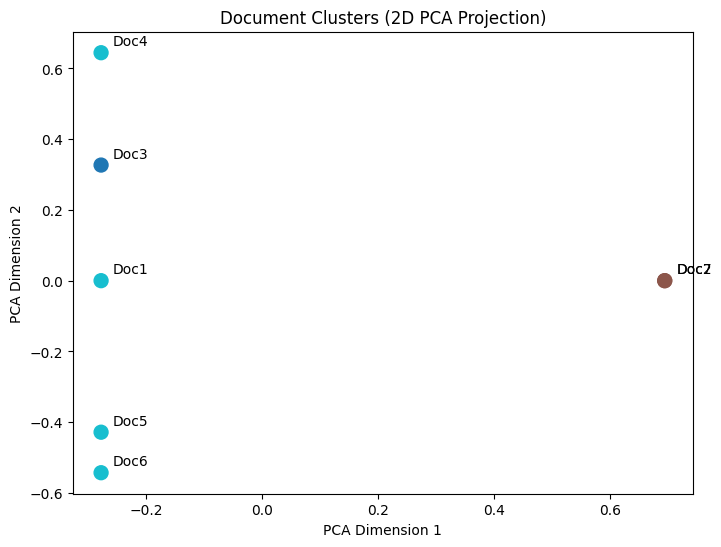

In [27]:
# Reduce TF-IDF features to 2 dimensions using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_tfidf.toarray())

# Scatter plot of documents in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df['cluster'], cmap='tab10', s=100)

# Add labels to each document point
for i, txt in enumerate(range(len(df))):
    plt.annotate(f"Doc{txt+1}", (X_2d[i, 0]+0.02, X_2d[i, 1]+0.02))

plt.title("Document Clusters (2D PCA Projection)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

Each color represents a cluster. Points close together are more textually similar.

Step 10. Word Clouds per Cluster

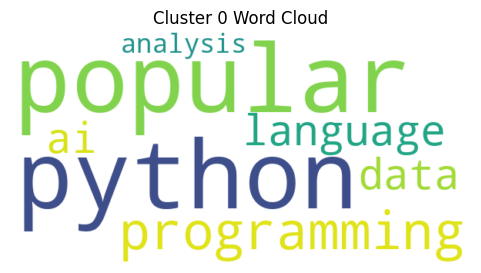

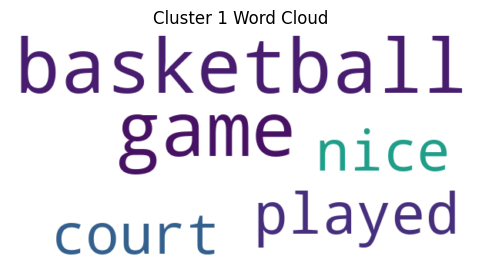

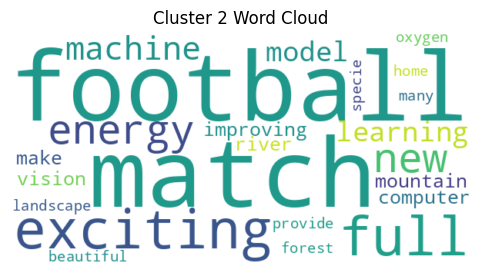

In [28]:
# Generate separate word clouds for each cluster to interpret cluster topics
for cluster_id in sorted(df['cluster'].unique()):
    # Combine text of all documents in a cluster
    cluster_text = " ".join(df[df['cluster'] == cluster_id]['clean_text'])

    # Create word cloud for that cluster
    wc = WordCloud(width=600, height=300, background_color='white').generate(cluster_text)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster_id} Word Cloud")
    plt.show()